# Notebook Aula 2 - Análise e Pré-Processamento de Dados
## Parte 1: Análise Exploratória de Dados

@Juarez_Monteiro

# Medidas de Localidade

* Dados categóricos
    * Moda
    
* Dados numéricos
    * Média
    * Mediana
    * Percentil

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import mode
from scipy.stats import skew
from scipy.stats import kurtosis

### Frequência
* Proporção de vezes que determinada categoria acontece em um atributo categórico

In [2]:
mancha = np.array(['grande', 'pequena', 'grande', 'pequena', 'grande', 'grande'])

# Calcula a frequencia da categoria grande no atributo 'mancha'
frequencia = ((mancha == 'grande').sum() / float(mancha.size))

print 'Frequência da categoria "Grande" é %.3f' % frequencia

Frequência da categoria "Grande" é 0.667


### ** Moda **
* Valor que ocorre com maior frequência em um conjunto de dados.

In [3]:
mancha = np.array(['grande', 'pequena', 'grande', 'pequena', 'grande', 'grande'])

# Calcula a moda do array.
# Retorna a moda e quantidade de vezes correspondente.
moda, qtd = mode(mancha)

print 'A moda é a categoria "{}". Quantidade de vezes que ocorre: {}'.format(moda[0], qtd[0])

A moda é a categoria "grande". Quantidade de vezes que ocorre: 4


/home/juarez/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


### **Média**
1. Pode ser calculada facilmente;
2. Problema: sensível a outliers;
3. É bom indicador do centro do conjunto de valores quando estes estão distribuídos simetricamente.

### **Mediana**
1. Menos sensível a outliers que a média;
2. Necessário ordernar valores;
3. Complexidade pior que linear no pior caso;
4. Indica melhor centro
    5. Se distribuição é oblíqua (assimétrica, _skewed_);
    6. Se existem _outliers_.

In [4]:
idade = np.array([23, 20, 22, 21, 110])

# Calcula a média do array.
media = idade.mean()

# Calcula a mediana do array.
mediana = np.median(idade)

print 'A média das idades é {0:.2f} e a mediana é {1:.2f}'.format(media, mediana)

A média das idades é 39.20 e a mediana é 22.00


### ** Média Podada **
1. _Trimmed mean_;
2. Minimiza problema da média descartando valores dos extremos
    3. Dados são ordenados;
    4. Elimina *p%* dos valores em cada extremidade.

In [5]:
from scipy.stats import trim_mean

x = np.array([1, 2, 3, 4, 5])

# Eliminar 20% (0.2) dos valores em cada extremidade
media_podada = trim_mean(x, 0.2)

print media_podada

3.0


### ** Percentil **
1. O pº percentil é o valor observado tal que p% dos valores 
da amostra são menores que ele

In [6]:
x = np.array([1, 2, 3, 4, 5])

# Percentil 50% (mediana)
p50 = np.percentile(x,50)

print 'P50% = {}'.format(p50)

P50% = 3.0


[]

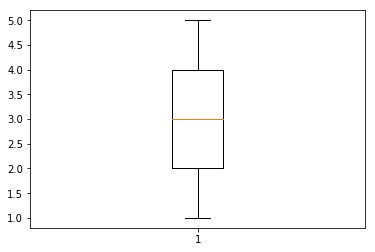

In [7]:
x = np.array([1, 2, 3, 4, 5])

#Boxplot
plt.boxplot(x)
plt.plot()

# Medidas de Espalhamento

* Medem a dispersão (ou grau de espalhamento) de um conjunto de valores;
* Indicam se um atributo está
    * Amplamente espalhado;
    * Relativamente concentrado em torno de um ponto (ex. média).
    
* Medidas comuns
    * Intervalo;
    * Variância;
    * Desvio padrão.


### ** Intervalo **
1. Medida simples;
2. Calcula o espalhamento máximo
3. Sejam {_x(1),..., x(n)_} os valores de _**x**_ para _N_ objetos: _r(**x**) = max(**x**) - min(**x**)_
4. **Atenção**: pode ser má ideia!
    5. Valores concentrados ao redor de um ponto, porém com alguns poucos valores extremos.

In [8]:
xi = np.array([3.20, 11.70, 13.64, 15.60, 15.89, 28.44, 29.07])
intervalo1 = xi.max() - xi.min()

print 'Intervalo 1: {0:.2f}'.format(intervalo1)


xj = np.array([3.20, 11.70, 13.64, 15.60, 15.89, 28.44, 29.07, 0.1, 1278.9])
intervalo2 = xj.max() - xj.min()

print 'Intervalo 2: {0:.2f}'.format(intervalo2)

Intervalo 1: 25.87
Intervalo 2: 1278.80


### ** Variância ($\sigma^2$) **
1. Medida **preferida** para análise de espalhamento
2. Denominador _(N-1)_: correção de Bessel, usada para uma melhor estimativa de verdadeira variância;
3. **Segundo momento central**;
4. Desvio padrão ($\sigma$): raiz quadrada da variância.

In [9]:
x = np.array([3.20, 11.70, 13.64, 15.60, 15.89, 28.44, 29.07])

# Calculando a variância pela fórmula (com correção de Bessel)
variance = ((x - x.mean())**2).sum() / float(x.size - 1)

# Calculando a variância com o numpy (com correção de Bessel)
variance1 = x.var(ddof=1)

# Calculando a variância com o numpy (sem correção de Bessel)
variance2 = x.var()

# Desvio padrão pela fórmula
desvio = np.sqrt(variance)

# Calculando o desvio padrão com o numpy (com correção de Bessel)
desvio1 = x.std(ddof=1)

# Calculando o desvio padrão com o numpy (sem correção de Bessel)
desvio2 = x.std()

print 'Variância pela fórmula: {:>14.2f}'.format(variance)
print 'Variância numpy: {:>21.2f}'.format(variance1)
print 'Variância numpy sem correção: {:>8.2f}'.format(variance2)
print 'Desvio padrão pela fórmula: {:>10.2f}'.format(desvio)
print 'Desvio padrão numpy: {:>17.2f}'.format(desvio1)
print 'Desvio padrão numpy sem correção: {:.2f}'.format(desvio2)


Variância pela fórmula:          84.88
Variância numpy:                 84.88
Variância numpy sem correção:    72.75
Desvio padrão pela fórmula:       9.21
Desvio padrão numpy:              9.21
Desvio padrão numpy sem correção: 8.53


### ** Obliquidade ($\gamma$) **
1. _Skewness_
    2. Mede a **simetria da distribuição** em torno da média
    3. Divisão por ($\sigma^3$) torna medida independente de escala
    4. **Terceiro momento central padronizado**

In [10]:
x = np.array([3.20, 11.70, 13.64, 15.60, 15.89, 28.44, 29.07])

media = x.mean()
desvio = x.std()
skewness = ((x - media)**3).sum() / float(x.size )
skewness = skewness / float(desvio**3)

# Calculando a obliquidade
# from scipy.stats import skew
oblq = skew(x, bias=True)

print 'Obliquidade (sem correção): {:>6.3f}'.format(skewness)
print 'Obliquidade com scipy.stats: {:.3f}'.format(oblq)

Obliquidade (sem correção):  0.174
Obliquidade com scipy.stats: 0.174


### ** Curtose ($\beta$) **
1. _Kurtosis_
    2. Mede a **formato (achatamento) da distribuição**
    3. **Quarto momento central** padronizado;
    4. Valor de $\beta(x)=3$ para distribuição normal padrão;
    5. Portanto, é comum subtrair $\beta(x)$ de 3 para que a distribuição normal padrão tenha $\beta(x) =0$

In [11]:
x = np.array([3.20, 11.70, 13.64, 15.60, 15.89, 28.44, 29.07])

media = x.mean()
desvio = x.std()
curt = ((x - media)**4).sum() / float(x.size)
curt = curt / float(desvio**4)

# Calculando a curtose
# from scipy.stats import kurtosis
curtose = kurtosis(x, fisher=False)
curtose2 = kurtosis(x, fisher=True)

print 'Curtose sem correção: {:>28.2f}'.format(curt)
print 'Curtose com scipy (sem subtração de Fisher): {:>5.2f}'.format(curtose)
print 'Curtose com scipy (com subtração de Fisher): {:.2f}'.format(curtose2)

Curtose sem correção:                         2.05
Curtose com scipy (sem subtração de Fisher):  2.05
Curtose com scipy (com subtração de Fisher): -0.95


# Dados Multivariados

* Medidas de espalhamento
    * Calculadas por atributo, de maneira independente;
        * Qualquer uma das medidas;
        
        
* Variáveis contínuas
    * Espalhamento do dataset pode ser capturado por uma **matriz de covariância**;
        * Cada elemento é a covariância do par de atributos;
 
 
* Covariância de dois atributos
    * Mede o grau com que os atributos variam juntos;
    * Covariância não indica com clareza o relacionamento entre os pares de atributos;
        * Sugestão é utilizar **correlação**;
            * Indica **relacionamento linear** entre 2 variáveis;
            * É preferível para explorar dados do que covariância;

In [12]:
# 4 instancias com 2 atributos cada (x0, x1)
x = np.array([[0, 4], [1, 3], [2, 2], [3, 1], [4,0]])

# Visualizar 4 instâncias
print 'Dados: \n', x, '\n'

# Calcular matriz pela fórmula 
# Note que no numpy, vetores são "linha" por definição
media = x.mean(axis=0)
matriz_cov = (x - media).T.dot((x-media)) / float(x.shape[0] - 1)

# Calcular matriz via numpy (note que a correção de Bessel é default)
cov_matrix = np.cov(x, rowvar=False)

print 'Matriz de covariância:'
print matriz_cov
print ''
print cov_matrix

Dados: 
[[0 4]
 [1 3]
 [2 2]
 [3 1]
 [4 0]] 

Matriz de covariância:
[[ 2.5 -2.5]
 [-2.5  2.5]]

[[ 2.5 -2.5]
 [-2.5  2.5]]


In [13]:
from scipy.stats.stats import pearsonr

a = np.array([900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
b = np.array([0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5])

# Correlação de Pearson entre a e b (scipy)
pearson, p_value = pearsonr(a,b)
print '{:.3f}'.format(pearson)
print ''

# Matriz de correlação com o numpy
correlacao = np.corrcoef(a,b, rowvar=False)
print correlacao

0.996

[[1.         0.99646528]
 [0.99646528 1.        ]]


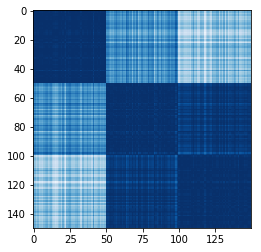

In [14]:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
from sklearn.datasets import load_iris

data = load_iris()
corr = np.corrcoef(data.values()[1])
plt.imshow(corr, cmap='Blues')

In [15]:
# Criando função para plotar o dataset abalone

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('plasma', 30)
    cax = ax1.imshow(df.corr(method='pearson'), interpolation="nearest", cmap=cmap)
    #ax1.grid(True)
    plt.title('Correlacao de Atributos (Dataset Abalone)')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.75, .8,.85,.90,.95,1])
    
    plt.show()

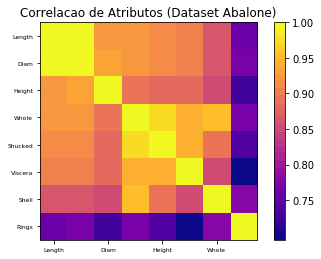

In [16]:
# Usando o pandas para criar um dataframe
# http://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas
from pandas import DataFrame, read_csv
f = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
df = read_csv(f)
df=df[0:200]

correlation_matrix(df)